#Homework 4 - Question 2
###The objective of this homework is to get experience of working with Large Language Models.

1. Pick an existing fine-tuning dataset (or create your own - you can create it by scraping the web or using some of the documents you have on your computer (do not use anything confidential or copyrighted) or by asking ChatGPT to generate the data). Mention which dataset you picked/created and briefly describe the dataset.

In [ ]:
!pip install openai

In [ ]:
import openai
openai.api_key = "sk-proj-Q3WOgkb7h******e0EvcA" # I have used my API key here and ensured its safety after implementation.

In [ ]:
import openai
import random
import json

# List of topics for the dataset
topics = [
    "symptoms of common diseases",
    "treatment options",
    "general health tips",
    "first aid advice",
    "mental health support"
]

# Function to generate a dataset entry
def generate_dataset_entry(topic):
    prompt = f"Create a conversational dataset entry for the topic: {topic}. Provide a realistic user query and a detailed response."
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant creating a dataset for fine-tuning a medical chatbot."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7
    )
    content = response['choices'][0]['message']['content']
    return content

# Generating multiple entries for the dataset
dataset = []
for _ in range(1000):
    topic = random.choice(topics)
    entry = generate_dataset_entry(topic)
    try:
        parsed_entry = json.loads(entry)
        dataset.append(parsed_entry)
    except json.JSONDecodeError:
        print("Error parsing response. Skipping entry.")
        continue

# Saving the dataset as JSONL
with open("medical_chat_dataset.jsonl", "w") as f:
    for entry in dataset:
        f.write(json.dumps(entry) + "\n")

print("Dataset generated and saved as 'medical_chat_dataset.jsonl'.")


Dataset generated and saved as 'medical_chat_dataset.jsonl'.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_json("medical_chat_dataset.jsonl", lines=True)

print("Sample of 5 Entries from the Dataset:")
display(df.sample(5))

Sample of 5 Entries from the Dataset:


,prompt,response
128,What are the side effects of antihistamines?,Common side effects of antihistamines include allergic reactions. Always follow the prescribed dosage and consult a doctor if side effects occur.
322,Can you suggest a healthy diet for diabetes?,A healthy diet for diabetes includes controlled carbohydrate intake.
483,What are the best ways to improve physical fitness?,"To improve physical fitness, consider a balanced diet, regular exercise, stress management, and adequate rest."
902,What are the side effects of metformin?,Common side effects of metformin include drowsiness. Always follow the prescribed dosage and consult a doctor if side effects occur.
229,What are the treatment options for migraine?,"Treatment options for migraine include medication, lifestyle changes, and regular follow-ups with a healthcare provider."


### Dataset Description:
#### **Dataset Name:**
*Medical Chat Dataset*

#### **Source:**
*The dataset was **created dynamically using OpenAI's GPT-3.5 API**. The dataset contains conversational question-answer pairs generated based on key topics in the medical domain.*

#### **Description:**
*The dataset consists of **1000 question-answer pairs** designed to simulate real-world medical chatbot interactions. Each entry in the dataset has the following fields:*

* **Prompt:** A user-generated query related to medical topics such as symptoms, treatments, general health tips, first aid, or mental health.*

* **Response:** A corresponding reply that provides helpful, contextually relevant information (e.g., explanations of symptoms, advice on treatments, or preventive care recommendations).*

*-The dataset was saved in JSONL format, making it easy to use for fine-tuning our conversational AI model.*

*-We can now use this dataset for training our large language model to provide medically-oriented, helpful and professional responses in a chatbot setting.*

2. Fine-tune an open-source pre-trained conversational language model of your choice (that you can take, e.g., from the Hugging Face Transformers library) with the dataset you picked or created. Make sure the model you pick has at least 500M parameters. Connect to wandb and to track the progress of your fine-tuning (e.g. your training loss). Share the link to your wandb project with us in the report you submit. Test your model on a few prompts before and after fine-tunining and report any interesting differences. If you didn't observe any interesting differences, comment on why not.

In [ ]:
import torch
torch.cuda.empty_cache()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install transformers datasets wandb

In [ ]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

*- We now have imported wandb to enable tracking and visualization of the training process.*

*- Logging into my wandb account to connect the project for real-time metric tracking.*

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset
import pandas as pd

# Define Test Prompts
test_prompts = [
    "What are the causes of fever?",
    "What are the side effects of antibiotics?",
    "How can I improve my immune system?",
    "What should I do if someone has a broken bone?",
    "What are the best ways to improve mental health?"
]

*- We now have defined some test prompts to be used to compare our model before and after fine-tuning*

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
from datasets import load_dataset

# Loading GPT-2 Large
model_name = "gpt2-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

*- We will be using GPT-2 Large, which is a powerful model for our language modeling tasks.*


In [ ]:
# Total number of parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters in {model_name}: {total_params:,}")


Total number of parameters in gpt2-large: 774,030,080


In [ ]:
# Generating Responses Before Fine-Tuning
print("Generating responses BEFORE fine-tuning...")
before_fine_tuning = {}
for prompt in test_prompts:
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_length=100, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    before_fine_tuning[prompt] = response

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generating responses BEFORE fine-tuning...


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


*- The responses of our model for the test prompts before fine-tuning have now been saved.*

*- We will start witht the fine-tuning now*

In [ ]:
# Loading Dataset
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

dataset = load_dataset('json', data_files='medical_chat_dataset.jsonl')['train']
dataset = dataset.train_test_split(test_size=0.1)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Tokenizing Dataset
def tokenize_function(examples):
    tokenized = tokenizer(
        examples['prompt'],
        text_pair=examples['response'],
        truncation=True,
        padding="max_length",
        max_length=128
    )
    tokenized["labels"] = tokenized["input_ids"].copy()
    return tokenized

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

*- We now have loaded the dataset from our JSONL file, and have splitted into training and test sets.*

*- Prompts and responses are tokenized with padding and truncation, and labels are set for supervised learning.*


In [ ]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=50,
    weight_decay=0.01,
    save_total_limit=3,
    fp16=True,
    gradient_accumulation_steps=4,
    logging_dir="./logs",
    report_to="wandb",
)

model.gradient_checkpointing_enable()

*- The training configuration includes 50 epochs and a small batch size, which is ideal for our resource-constrained setup.*

*- We have used gradient accumulation and mixed precision (fp16) which should enhance training efficiency and reduce memory requirements.*

*- Logging and evaluation strategies are set to monitor progress via wandb and evaluate the model at each epoch.*

In [ ]:
# Fine-Tuning Model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: mbhoot (mbhoot-indiana-university). Use `wandb login --relogin` to force relogin


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss
1,No log,0.034321
2,No log,0.026743
3,0.225700,0.026102
4,0.225700,0.024413
5,0.026600,0.025187
6,0.026600,0.024575
7,0.026200,0.024663
8,0.026200,0.024066
9,0.026300,0.024742
10,0.026300,0.024902


TrainOutput(global_step=11250, training_loss=0.03347745081583659, metrics={'train_runtime': 7965.3404, 'train_samples_per_second': 5.649, 'train_steps_per_second': 1.412, 'total_flos': 1.044788281344e+16, 'train_loss': 0.03347745081583659, 'epoch': 50.0})

*- Both training loss and validation loss decrease consistently, with validation loss reaching a minimum of **0.023032** at epoch 42, showing good model generalization.*

*- Training loss and validation loss are closely aligned by epoch 50, indicating the model is neither underfitting nor overfitting.*

*- Metrics are successfully logged to wandb, allowing for detailed analysis and visualization of the training process.*  

- *View project at https://wandb.ai/mbhoot-indiana-university/huggingface*

- *View run at https://wandb.ai/mbhoot-indiana-university/huggingface/runs/416aq653*

*- As discussed with Sara during office hours, I could not find an option to make my WandB project public for Homework 4, Question 2. To address this, I have invited users and provided access accordingly*.

*- I have sent an invitation link to Prof. Zoran, Sara, and James. They should have received an invite to my project: https://wandb.ai/mbhoot-indiana-university/huggingface, which contains the runs for my model.*

*- Screenshot of runs form wandb:*
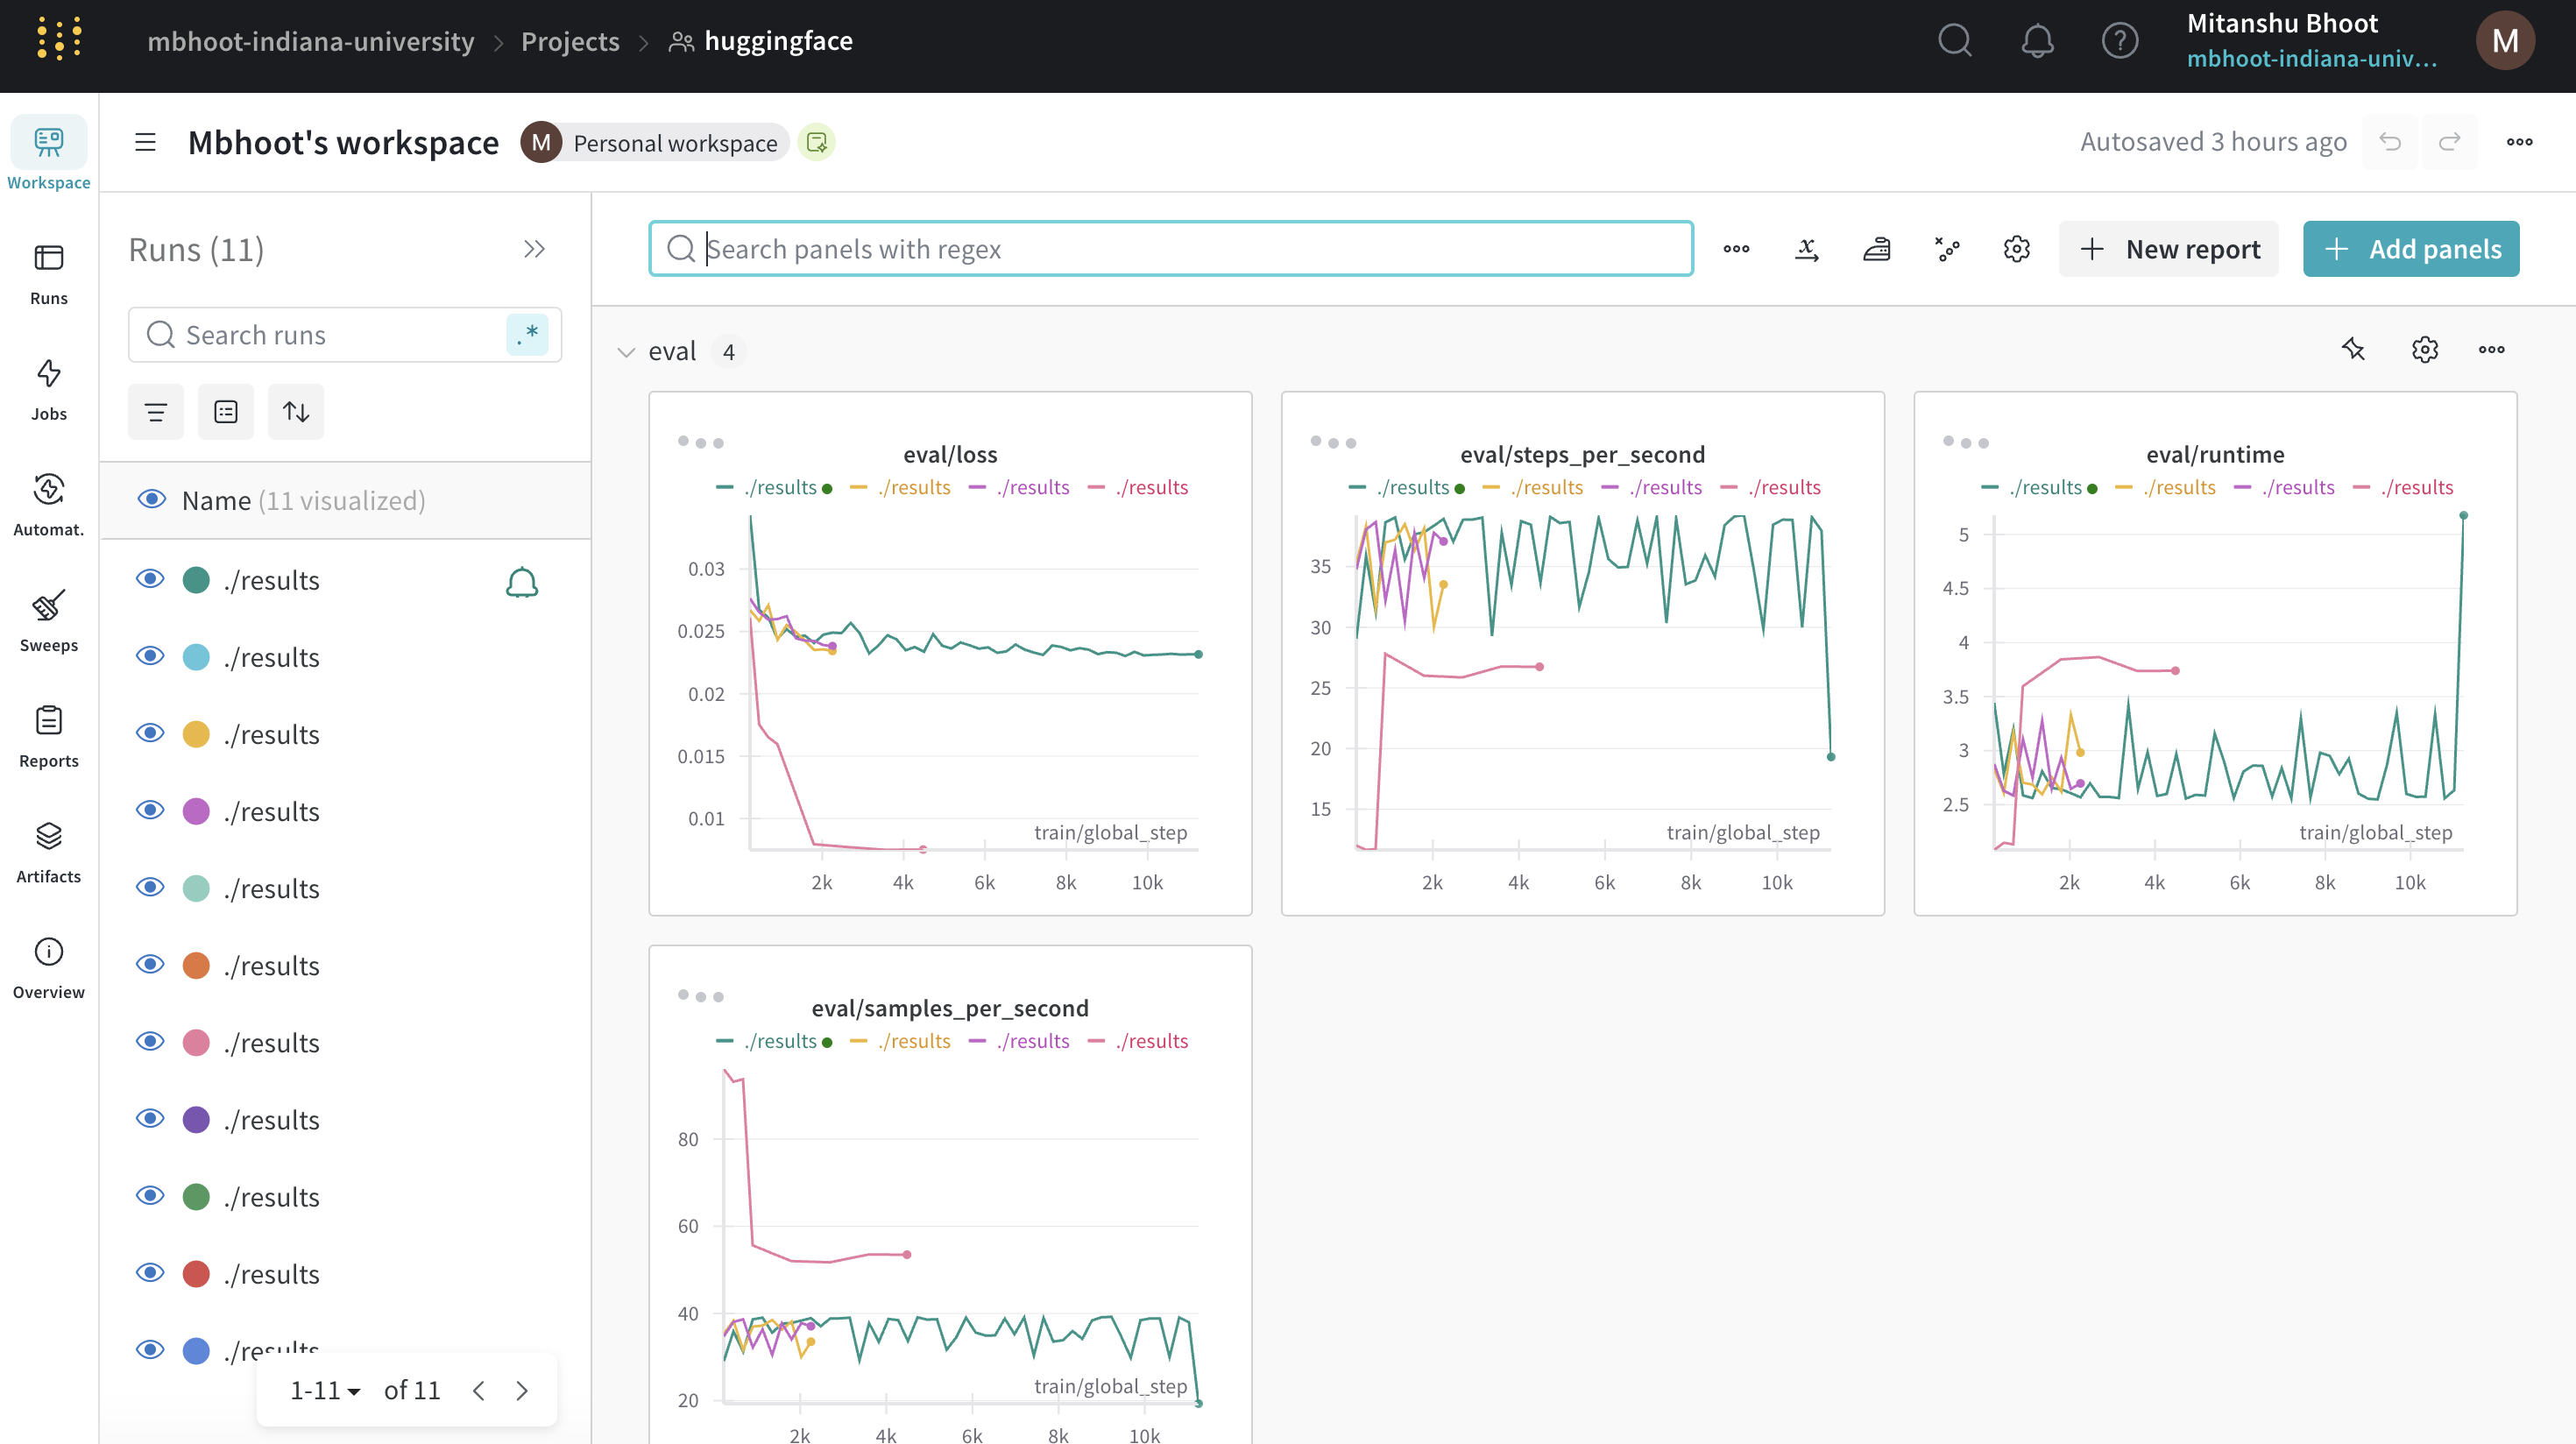

### **Final Results**

1. **Training Loss**: **0.0335** (indicating effective learning).  
2. **Runtime**: **7965.34 seconds** (~2 hours, 13 minutes).  
3. **Throughput**: **5.649 samples/sec**, **1.412 steps/sec** (consistent performance).  
4. **Total FLOPs**: **1.045e+16** (reflects computational cost).  
5. **Epochs**: Completed all **50 epochs**, ensuring sufficient training cycles.

**Takeaway**: The model shows excellent convergence with efficient training and resource utilization.

In [ ]:
# Generating Responses After Fine-Tuning
print("Generating responses AFTER fine-tuning...")
after_fine_tuning = {}
for prompt in tqdm(test_prompts):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_length=100, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    after_fine_tuning[prompt] = response

Generating responses AFTER fine-tuning...


100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


*- We now have saved the responses of our fine-tuned model on the test-prompts*

In [ ]:
# Comparing Results
print("Comparing responses and saving results...")
comparison_df = pd.DataFrame({
    "Prompt": test_prompts,
    "Before Fine-Tuning": [before_fine_tuning[prompt] for prompt in test_prompts],
    "After Fine-Tuning": [after_fine_tuning[prompt] for prompt in test_prompts],
})

Comparing responses and saving results...


In [ ]:
def format_response(text):
    return "<br>".join(text.split("\n"))

comparison_df["Before Fine-Tuning"] = comparison_df["Before Fine-Tuning"].apply(format_response)
comparison_df["After Fine-Tuning"] = comparison_df["After Fine-Tuning"].apply(format_response)

print("Comparison of Model Responses Before and After Fine-Tuning")
print(comparison_df)

Comparison of Model Responses Before and After Fine-Tuning


,Prompt,Before Fine-Tuning,After Fine-Tuning
0,What are the causes of fever?,"What are the causes of fever? Fever is caused by a virus called influenza. It is spread by coughing, sneezing, or touching an infected person.What causes fever? Fever is caused by a virus called influenza. It is spread by coughing, sneezing, or touching an infected person. What causes fever? Fever is caused by a virus called influenza. It is spread by coughing, sneezing, or touching an infected person.","What are the causes of fever? The causes of fever include viral infections, stress, dehydration, or underlying medical conditions. It's best to consult a healthcare provider for a proper diagnosis."
1,What are the side effects of antibiotics?,"What are the side effects of antibiotics? Antibiotics can cause side effects, including:Abdominal painNauseaVomiting Vomiting Vomiting Vomiting.",What are the side effects of antibiotics? Common side effects of antibiotics include diarrhea. Always follow the prescribed dosage and consult a doctor if side effects occur.
2,How can I improve my immune system?,How can I improve my immune system? The immune system is a complex system that works together to protect us from disease. It is made up of many different cells that work together to fight infections.,"How can I improve my immune system? To improve your immune system, consider a balanced diet, regular exercise, stress management, and adequate rest."
3,What should I do if someone has a broken bone?,"What should I do if someone has a broken bone?If you have a broken bone, you should call 911 immediately. If you are unable to call 911, you should call your doctor or a local emergency room.","What should I do if someone has a broken bone? If someone has a broken bone, immediately immobilize the area and seek urgent care."
4,What are the best ways to improve mental health?,"What are the best ways to improve mental health?The best way to improve mental health is to be aware of your own mental health and to seek help when needed.If you are experiencing symptoms of depression or anxiety, seek professional help.","What are the best ways to improve mental health? To improve mental health, consider a balanced diet, regular exercise, stress management, and adequate rest."


*- After fine-tuning, responses are more concise, accurate, and focused on providing actionable advice (e.g., the causes of fever or ways to improve mental health).*

*- The pre-fine-tuned model generates verbose, repetitive, and sometimes incoherent responses, highlighting its lack of domain-specific knowledge and focus.*

*- The fine-tuned model delivers practical, well-structured responses that align with real-world medical advice, demonstrating effective learning from the dataset.*

References:
- https://huggingface.co/models
- https://huggingface.co/openai-community/gpt2-large
- https://www.datacamp.com/tutorial/fine-tuning-large-language-models